# enfoque clásico
## Suavizamiento

Modelo ETS (Tendencia-Estacionalidad-Irregular)

Statsmodels proporciona una herramienta de descomposición estacional que podemos usar para separar los diferentes componentes de una serie de tiempo.

Aplicamos un modelo aditivo cuando parece que la tendencia es más lineal y los componentes de estacionalidad y tendencia parecen ser constantes en el tiempo.

Un modelo multiplicativo es más apropiado cuando estamos aumentando (o disminuyendo) a una tasa no lineal.

Para estos ejemplos, usaremos los datos de Pasajeros de líneas aéreas internacionales, que brinda totales mensuales en miles desde enero de 1949 hasta diciembre de 1960.

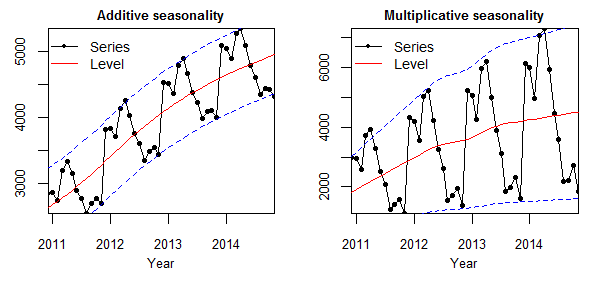

In [51]:
# importar las librerias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# imoportar desde gothub la base de pasajeros de avión airline_passengers.csv
# parámetros a especificar:
# index_col='Month' para que tome la variable Month como el index
# parse_dates=True para que el index se interprete como fecha
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates = True)


In [6]:
pasajeros

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
# especificar que son datos mensuales
pasajeros.index.freq = 'MS'




In [8]:
# renombrar la columna thousands passangers
pasajeros.rename(columns={'Thousands of Passengers':'Miles de pasajeros'},inplace=True)

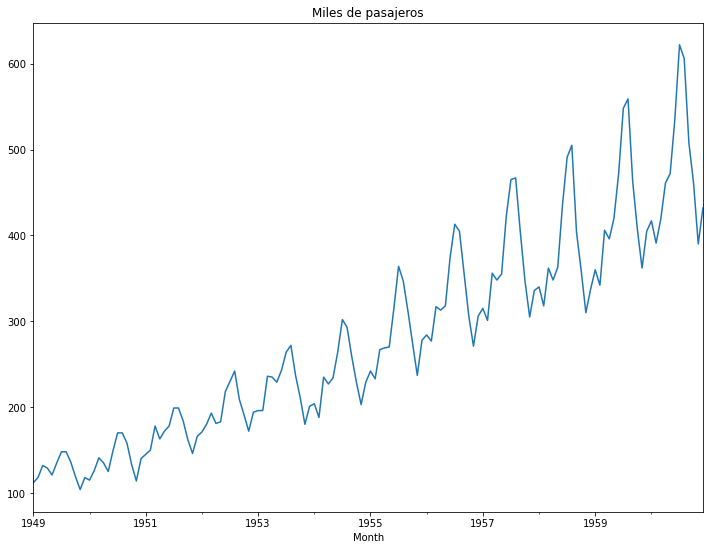

In [13]:
#graficar la serie de tiempo
pasajeros['Miles de pasajeros'].plot(figsize=(12,9));
plt.title('Miles de pasajeros');

In [14]:
## importar statmodels para descomposición de la serie de tiempo
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
# acceder a la tendencia
results = seasonal_decompose(pasajeros['Miles de pasajeros'], model='add')


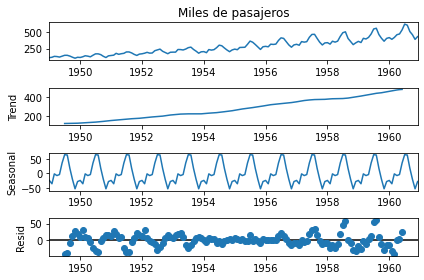

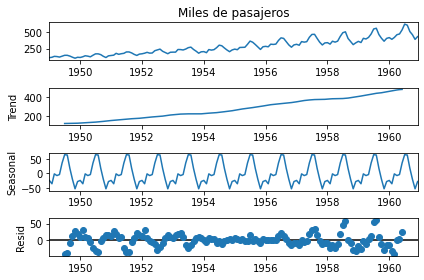

In [16]:
results.plot()

In [17]:
results.trend.head(10)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Freq: MS, Name: trend, dtype: float64

In [20]:
#acceder al componente estacional
results.seasonal 


Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Freq: MS, Name: seasonal, Length: 144, dtype: float64

In [22]:
results.resid.head(10)

Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
Freq: MS, Name: resid, dtype: float64

In [25]:
pasajeros['serie desestacionalizadaA'] = pasajeros['Miles de pasajeros'] - results.seasonal

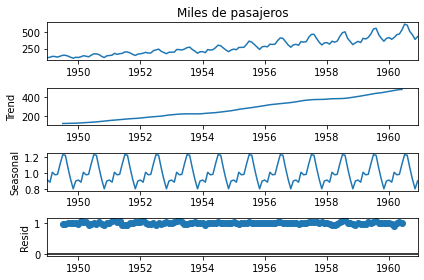

In [26]:
results = seasonal_decompose(pasajeros['Miles de pasajeros'], model='mul')
results.plot();

In [32]:
pasajeros['serie desestacionalizadaM'] = pasajeros['Miles de pasajeros'] / results.seasonal

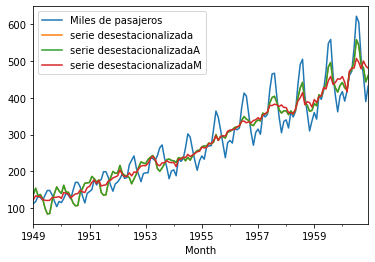

In [33]:
pasajeros.plot();

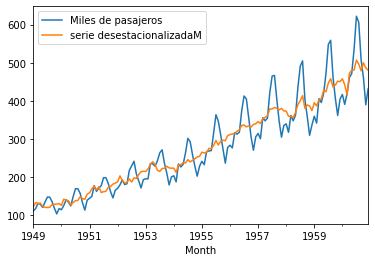

In [35]:
pasajeros[['Miles de pasajeros', 'serie desestacionalizadaM']].plot();

# Promedios móvil

## Promedio móvil simple (SMA)

In [46]:
pasajeros['6-SMA'] = pasajeros['Miles de pasajeros'].rolling(window=6).mean()
pasajeros['12-SMA'] = pasajeros['Miles de pasajeros'].rolling(window=12).mean()

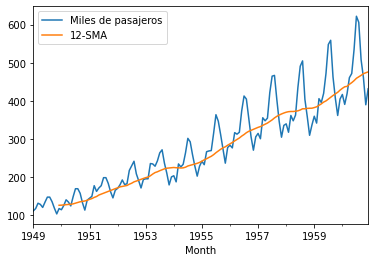

In [48]:
pasajeros[['Miles de pasajeros', '12-SMA']].plot();

In [49]:
pasajeros['7-MA'] = pasajeros['Miles de pasajeros'].rolling(window=7, center=True).mean()

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01    127.857143
1949-05-01    133.000000
                 ...    
1960-08-01    513.428571
1960-09-01    507.714286
1960-10-01           NaN
1960-11-01           NaN
1960-12-01           NaN
Freq: MS, Name: Miles de pasajeros, Length: 144, dtype: float64

In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
walmex = yf.download('WALMEX.MX', start = '2019-01-01', end='2022-09-30', progress=False)

NameError: name 'yf' is not defined

In [8]:
walmex['retorno_simple'] = walmex.adj_close.pct_change()

NameError: name 'walmex' is not defined

In [7]:
print('Rango de fechas:' min(walmex.index.date), '-', max(walmex.index.date))
print('Numero de observaciones:', walmex.shape[0])
print(f'Media: {walmex.retorno_simple.mean(): .4f}')
print(f'Mediana: {walmex.retorno_simple.median(): .4f}')
print(f'Minimo: {walmex.retorno_simple.min(): .4f}')
print(f'Maximo: {walmex.retorno_simple.max(): .4f}')
print(f'Desvación Estandar: {walmex.retorno_simple.std(): .4f}')
print(f'Skewness (símetria): {walmex.retorno_simple.skew(): .4f}')
print(f'Kurtosis: {walmex.retorno_simple.kurtosis(): .4f}')


SyntaxError: invalid syntax (3135568863.py, line 1)

In [ ]:
walmex['MA10']= walmex['adj_close'].rolling(10).mean()
walmex['MA50']= walmex['adj_close'].rolling(50.).mean()
walmex=walmex.dropno

In [ ]:
walmex[['adj_close', 'MA50', 'MA10']].plot(figsize=10, 15)
plt.title('Precio de acción de walmart en pesos 2019-2022')
plt.show()

In [ ]:
[16:43] ANGELICA NALLELY RAMIREZ ALANIS
walmex['Share']= [1 if walmex.loc[ei, 'MA10']> walmex.loc[ei, 'MA50'] else 0 for ei in walmex.index]


In [ ]:
walmex['close_adj']= walmex['adj_close'].shift(-1)
walmex['Profit']= [walmex.loc[ei, 'close_ayer']-walmex.loc[ei, 'adj_close']] if walmex.loc[ei, 'shares']==1 esle 0 for ei in walmex.index
walmex['profit'].plot()
plt.axhline(y=0, color='red')
plt.show

In [3]:
walmex['ganancia_acumulada'] = walmex['profit'].cumsum()
walmex.tail()

NameError: name 'walmex' is not defined

In [ ]:
walmex['ganancias_acumulada'].plot()
plt.title('la cantidad de dinero ganada es{}'.format(walmex.loc[walmex.index[-2], 'ganancia_acumulada'])
plt.show()